<a href="https://colab.research.google.com/github/jsmnithya/Guvi/blob/main/Assignment_4_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Boston Housing Dataset**

**Predicting Median value of owner-occupied homes**

The aim of this assignment is to learn the application of machine learning algorithms to data sets. This involves learning what data means, how to handle data, training, cross validation, prediction, testing your model, etc.

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

In [ ]:
#importing important file
import pandas as pd
#uploading dataset
df = pd.read_csv('HousingData.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.shape

(506, 14)

**The dataset is small in size with only 506 cases. It can be used to predict the median value of a home, which is done here. There are 14 attributes in each case of the dataset. They are:**

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940


DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


**DATA CLEANING**

In [ ]:
#Null value analysis
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
#analysing formate or datatype of the data
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
#imputing missing data
df['CRIM']=df['CRIM'].fillna(df['CRIM'].mean())
df['ZN']=df['ZN'].fillna(df['ZN'].mean())
df['INDUS']=df['INDUS'].fillna(df['INDUS'].mean())
df['CHAS']=df['CHAS'].fillna(df['CHAS'].mean())
df['AGE']=df['AGE'].fillna(df['AGE'].mean())
df['LSTAT']=df['LSTAT'].fillna(df['LSTAT'].mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
#removing duplicates
df = df.drop_duplicates()
df.shape

(506, 14)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#Outlier detection
for col in df.columns:
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_threshold = df[col].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[col].quantile(0.25) - (1.5 * iqr)
  print("column name:", col)
  print('       upper threshold value:', upper_threshold)
  print('       lower threshold value:', lower_threshold)
  flag=0
  for i in range(1,8):
    if ((df[col].describe()[i]>=lower_threshold) and (df[col].describe()[i]<=upper_threshold)):
      pass
    else:
      flag=1
      break
  if i==1:
    print(col, '=> Outlier Detected')
  else:
    print(col, '=> Outlier Not Detected')

column name: CRIM
       upper threshold value: 8.90483242798354
       lower threshold value: -5.2097234567901225
CRIM => Outlier Not Detected
column name: ZN
       upper threshold value: 28.0298353909465
       lower threshold value: -16.8179012345679
ZN => Outlier Not Detected
column name: INDUS
       upper threshold value: 37.465
       lower threshold value: -14.175
INDUS => Outlier Not Detected
column name: CHAS
       upper threshold value: 0.0
       lower threshold value: 0.0
CHAS => Outlier Detected
column name: NOX
       upper threshold value: 0.8865
       lower threshold value: 0.18650000000000005
NOX => Outlier Not Detected
column name: RM
       upper threshold value: 7.730500000000001
       lower threshold value: 4.778499999999999
RM => Outlier Not Detected
column name: AGE
       upper threshold value: 165.04999999999998
       lower threshold value: -25.549999999999997
AGE => Outlier Not Detected
column name: DIS
       upper threshold value: 9.820800000000002
   

In [ ]:
df.shape
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# EDA

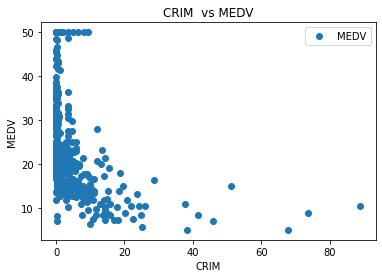

,CRIM,MEDV
CRIM,1.000000,-0.379695
MEDV,-0.379695,1.000000


In [ ]:
#finding correlation among the features and target variable
df.plot(x='CRIM', y='MEDV', style='o')
plt.title('CRIM  vs MEDV')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()
df[['CRIM','MEDV']].corr()

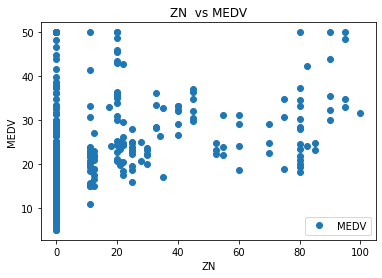

,ZN,MEDV
ZN,1.000000,0.365943
MEDV,0.365943,1.000000


In [ ]:
df.plot(x='ZN', y='MEDV', style='o')
plt.title('ZN  vs MEDV')
plt.xlabel('ZN')
plt.ylabel('MEDV')
plt.show()
df[['ZN','MEDV']].corr()

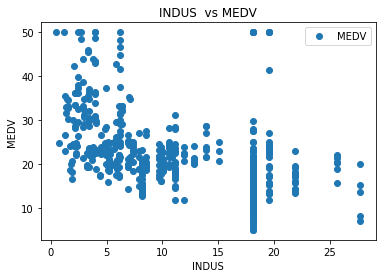

,INDUS,MEDV
INDUS,1.000000,-0.478657
MEDV,-0.478657,1.000000


In [ ]:
df.plot(x='INDUS', y='MEDV', style='o')
plt.title('INDUS  vs MEDV')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.show()
df[['INDUS','MEDV']].corr()

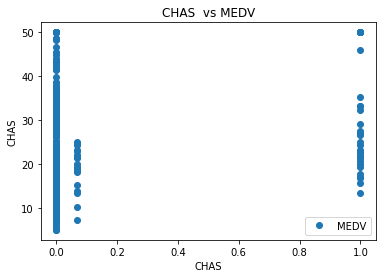

,CHAS,MEDV
CHAS,1.000000,0.179882
MEDV,0.179882,1.000000


In [ ]:
df.plot(x='CHAS', y='MEDV', style='o')
plt.title('CHAS  vs MEDV')
plt.xlabel('CHAS')
plt.ylabel('CHAS')
plt.show()
df[['CHAS','MEDV']].corr()

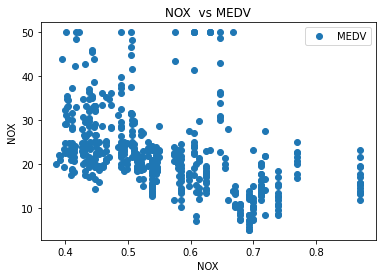

,NOX,MEDV
NOX,1.000000,-0.427321
MEDV,-0.427321,1.000000


In [ ]:
df.plot(x='NOX', y='MEDV', style='o')
plt.title('NOX  vs MEDV')
plt.xlabel('NOX')
plt.ylabel('NOX')
plt.show()
df[['NOX','MEDV']].corr()

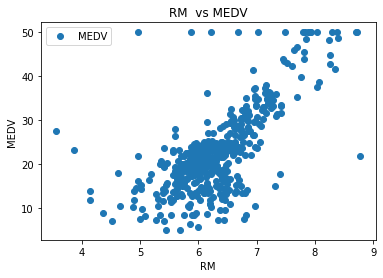

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [ ]:
df.plot(x='RM', y='MEDV', style='o')
plt.title('RM  vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()
df[['RM','MEDV']].corr()

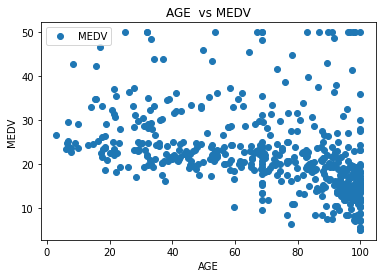

,AGE,MEDV
AGE,1.000000,-0.380223
MEDV,-0.380223,1.000000


In [ ]:
df.plot(x='AGE', y='MEDV', style='o')
plt.title('AGE  vs MEDV')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()
df[['AGE','MEDV']].corr()

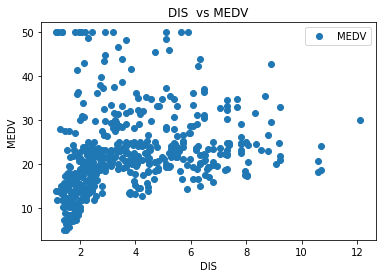

,DIS,MEDV
DIS,1.000000,0.249929
MEDV,0.249929,1.000000


In [ ]:
df.plot(x='DIS', y='MEDV', style='o')
plt.title('DIS  vs MEDV')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()
df[['DIS','MEDV']].corr()

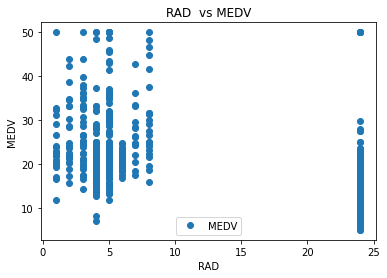

,RAD,MEDV
RAD,1.000000,-0.381626
MEDV,-0.381626,1.000000


In [ ]:
df.plot(x='RAD', y='MEDV', style='o')
plt.title('RAD  vs MEDV')
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.show()
df[['RAD','MEDV']].corr()

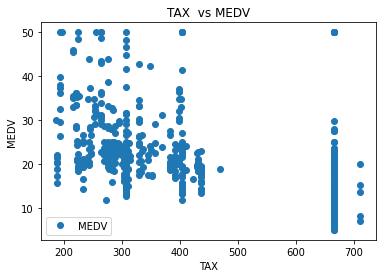

,TAX,MEDV
TAX,1.000000,-0.468536
MEDV,-0.468536,1.000000


In [ ]:
df.plot(x='TAX', y='MEDV', style='o')
plt.title('TAX  vs MEDV')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.show()
df[['TAX','MEDV']].corr()

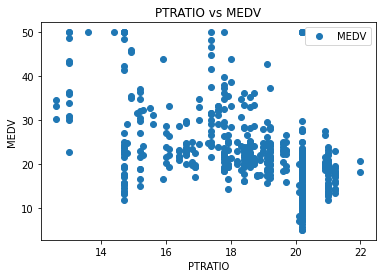

,PTRATIO,MEDV
PTRATIO,1.000000,-0.507787
MEDV,-0.507787,1.000000


In [ ]:
df.plot(x='PTRATIO', y='MEDV', style='o')
plt.title('PTRATIO vs MEDV')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()
df[['PTRATIO','MEDV']].corr()

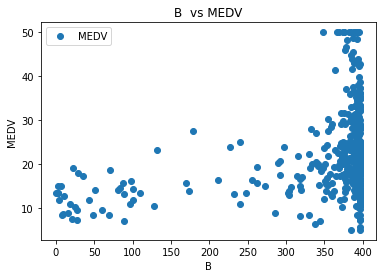

,B,MEDV
B,1.000000,0.333461
MEDV,0.333461,1.000000


In [ ]:
df.plot(x='B', y='MEDV', style='o')
plt.title('B  vs MEDV')
plt.xlabel('B')
plt.ylabel('MEDV')
plt.show()
df[['B','MEDV']].corr()

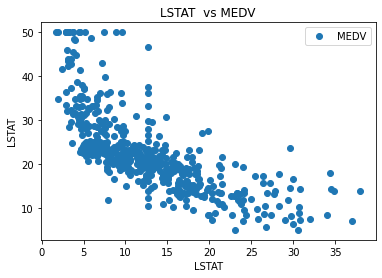

,LSTAT,MEDV
LSTAT,1.000000,-0.721975
MEDV,-0.721975,1.000000


In [ ]:
df.plot(x='LSTAT', y='MEDV', style='o')
plt.title('LSTAT  vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('LSTAT')
plt.show()
df[['LSTAT','MEDV']].corr()

In [ ]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
maxr=0
best_feature=''
mae=0
mse=0
for i in range(1,len(df.columns)):
  print(list(combinations(df.columns[:-1],i)))
  a=list(combinations(df.columns[:-1],i))
  for j in range(len(a)):
    print(list(a[j]))
    X = df[list(a[j])].values #array of features
    y = df['MEDV'].values
    
    #data spliting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #Scaling
    scaler = MinMaxScaler() #initialise to a variable
    scaler.fit(X_train) # we are finding the values of mean and sd from the td
    X_train_scaled = scaler.transform(X_train) # transform the training data
    X_test_scaled = scaler.transform(X_test) # transform the test data 

    #Model training
    regressor = LinearRegression()
    regressor.fit(X_train_scaled, y_train)

    #Predicting test data
    y_pred = regressor.predict(X_test_scaled)

    #Loss functions
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

    #getting r2 score value
    r2=metrics.r2_score(y_test,y_pred)
    print('R2- SCORE:', r2)

    #cross validation score
    regressor = LinearRegression(normalize = True)
    cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
    print('CROSS VALIDATION SCORE:', cv_results['test_score'].mean())

    if r2>maxr:
      maxr=r2
      best_feature=list(a[j])
      mae=metrics.mean_absolute_error(y_test, y_pred)
      mse=metrics.mean_squared_error(y_test, y_pred)
    # df.groupby(list(a[j]))['MEDV'].mean().plot(kind='scatter')
    # plt.title('Features vs MEDV')
    # plt.xlabel(a[j])
    # plt.ylabel('MEDV')
    # plt.show()
    # df[list(a[j])].corr()
    # df.groupby('MEDV')[list(a[j])].corr()
print("Best R2 score is ", maxr)
print('Best feature for the corresponding R2 value is ', best_feature)
print('Mean Absolute Error for above feature is:', mae)
print('Mean Squared Error for above feature is:', mse)

Streaming output truncated to the last 5000 lines.
R2- SCORE: 0.6390032717016771
CROSS VALIDATION SCORE: 0.15755200786105553
['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'B', 'LSTAT']
Mean Absolute Error: 3.75978364155958
Mean Squared Error: 29.488135227646143
R2- SCORE: 0.6354820909597736
CROSS VALIDATION SCORE: 0.13700417927177674
['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B']
Mean Absolute Error: 3.750999896445901
Mean Squared Error: 39.37655096254697
R2- SCORE: 0.4188436624818608
CROSS VALIDATION SCORE: 0.11426458136100107
['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
Mean Absolute Error: 3.7006070190062936
Mean Squared Error: 30.675644429506463
R2- SCORE: 0.6795616802800895
CROSS VALIDATION SCORE: 0.21115025238820911
['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX', 'B', 'LSTAT']
Mean Absolute Error: 4.043720539548689
Mean Squared Error: 32.20194256375791
R2- SCORE: 0.6441329110374608
CROSS VALIDATION SCORE: 0.179098039552313

ValueError: ignored

ValueError: ignored